# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd

previsao_de_renda = pd.read_csv("previsao_de_renda.csv")

previsao_de_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
print(previsao_de_renda.columns.tolist())

['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda']


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [11]:
import pandas as pd

# Seleciona apenas colunas numéricas
num_cols = previsao_de_renda.select_dtypes(include="number")

# Calcula a matriz de correlação
corr = num_cols.corr()

# Cria um ranking ordenado das correlações com 'renda'
corr_renda = corr["renda"].drop("renda").sort_values(ascending=False)

# Exibe o ranking
print("Ranking de correlação com 'renda':\n")
print(corr_renda)

# Mostra as duas maiores correlações
print("\n As duas variáveis mais correlacionadas são:")
print(corr_renda.head(2))

Ranking de correlação com 'renda':

tempo_emprego            0.394235
idade                    0.042570
qt_pessoas_residencia    0.020977
qtd_filhos               0.009567
unnamed:_0               0.007646
index                   -0.001740
Name: renda, dtype: float64

 As duas variáveis mais correlacionadas são:
tempo_emprego    0.394235
idade            0.042570
Name: renda, dtype: float64


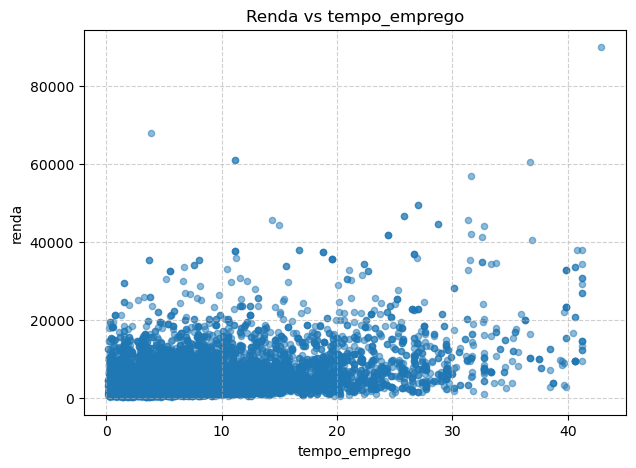

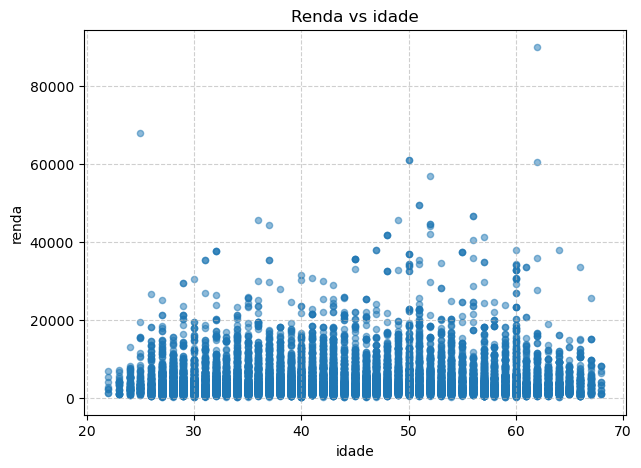

In [15]:
import matplotlib.pyplot as plt

# Lista das duas variáveis mais correlacionadas
variaveis = ["tempo_emprego", "idade"]

# Cria um gráfico de dispersão para cada variável
for col in variaveis:
    previsao_de_renda.plot.scatter(
        x=col,
        y="renda",
        alpha=0.5,
        title=f"Renda vs {col}",
        figsize=(7, 5)
    )
    plt.xlabel(col)
    plt.ylabel("renda")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()  

3) Na sua aopinião, há outliers na variável renda?

O método do IQR (Intervalo Interquartil) foi utilizado abaixo para identificar valores de renda muito distantes do padrão central dos dados. Primeiro, o código calcula o 1º quartil (Q1) e o 3º quartil (Q3), que delimitam os 50% centrais das observações. Em seguida, o IQR = Q3 - Q1 é usado para definir limites: valores abaixo de Q1 - 1.5×IQR ou acima de Q3 + 1.5×IQR são considerados outliers. Assim, o código detecta e destaca rendas anormalmente baixas ou altas em relação à maioria dos casos.

Em ambos os gráficos, observam-se pontos muito acima da concentração principal dos dados, especialmente valores de renda que ultrapassam 60.000 ou 80.000, enquanto a grande maioria está abaixo de 20.000.

Esses pontos isolados aparecem tanto em **“Renda vs tempo_emprego”** quanto em **“Renda vs idade”**, o que indica que eles não seguem o padrão esperado de variação com o tempo de emprego ou idade.

Portanto, é seguro afirmar que existem valores atípicos (outliers) na variável renda, possivelmente associados a indivíduos com rendas extremamente altas em relação à média da amostra.

Número de outliers detectados: 1026
Limite inferior: -3599.20
Limite superior: 11187.30


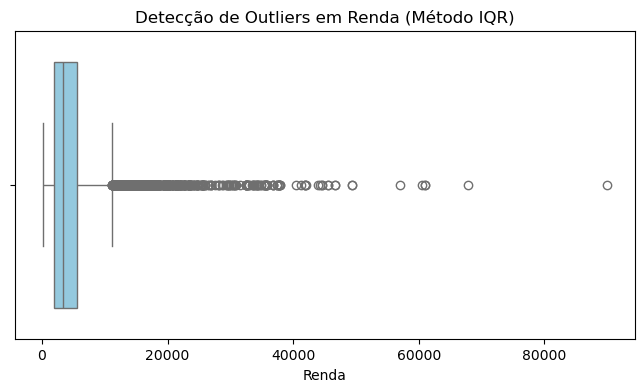

In [17]:
import seaborn as sns

# Calcula os quartis e o IQR
Q1 = previsao_de_renda["renda"].quantile(0.25)
Q3 = previsao_de_renda["renda"].quantile(0.75)
IQR = Q3 - Q1

# Define os limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identifica outliers
outliers = previsao_de_renda[
    (previsao_de_renda["renda"] < limite_inferior) |
    (previsao_de_renda["renda"] > limite_superior)
]

print(f"Número de outliers detectados: {len(outliers)}")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

# Visualiza os outliers em um boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=previsao_de_renda["renda"], color="skyblue")
plt.title("Detecção de Outliers em Renda (Método IQR)")
plt.xlabel("Renda")
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

O código abaixo cria uma nova coluna chamada **renda_log**, que contém o logaritmo natural da renda.
Isso serve para reduzir a influência de valores muito altos (outliers) e deixar a distribuição mais equilibrada.
Por fim, ele mostra as 5 primeiras linhas para confirmar o resultado.

In [18]:
import numpy as np

# Cria a nova coluna com o logaritmo natural da renda
previsao_de_renda["renda_log"] = np.log(previsao_de_renda["renda"])

# Mostra as 5 primeiras linhas para conferir
previsao_de_renda[["renda", "renda_log"]].head()

,renda,renda_log
0,3369.24,8.122442
1,6096.14,8.715411
2,5658.98,8.640999
3,7246.69,8.888300
4,4017.37,8.298383


O proximo código mostra quantos outliers ainda existem depois da transformação logarítmica.

In [19]:
# Calcula os quartis da renda log
Q1_log = previsao_de_renda["renda_log"].quantile(0.25)
Q3_log = previsao_de_renda["renda_log"].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Define os limites inferior e superior
limite_inferior_log = Q1_log - 1.5 * IQR_log
limite_superior_log = Q3_log + 1.5 * IQR_log

# Cria uma coluna indicando se é outlier ou não
previsao_de_renda["outlier_log"] = (
    (previsao_de_renda["renda_log"] < limite_inferior_log) |
    (previsao_de_renda["renda_log"] > limite_superior_log)
)

# Exibe o número de outliers encontrados
print(f"Outliers encontrados (log): {previsao_de_renda['outlier_log'].sum()}")

Outliers encontrados (log): 146


Finalmente,esse gráfico mostra como a transformação logarítmica reduz a influência dos valores extremos, deixando a distribuição muito mais compacta.

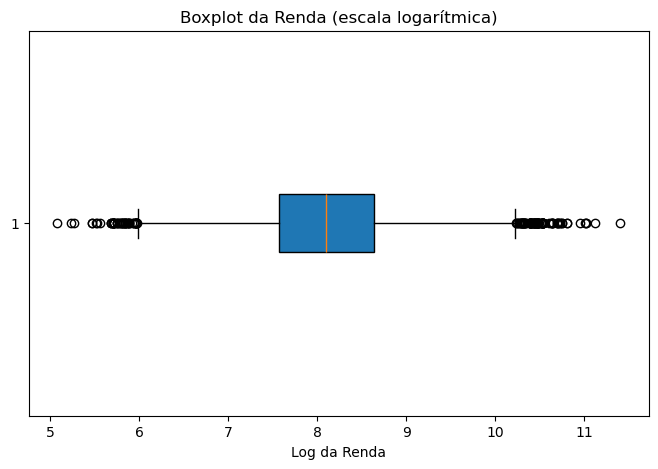

In [20]:
# Cria o boxplot da renda transformada em log
plt.figure(figsize=(8, 5))
plt.boxplot(previsao_de_renda["renda_log"], vert=False, patch_artist=True)
plt.title("Boxplot da Renda (escala logarítmica)")
plt.xlabel("Log da Renda")
plt.show()

O código abaixo cria gráficos de dispersão entre a renda logarítmica e as duas variáveis mais correlacionadas **(tempo_emprego e idade)**, permitindo visualizar a relação entre elas de forma mais clara e sem a distorção dos outliers.

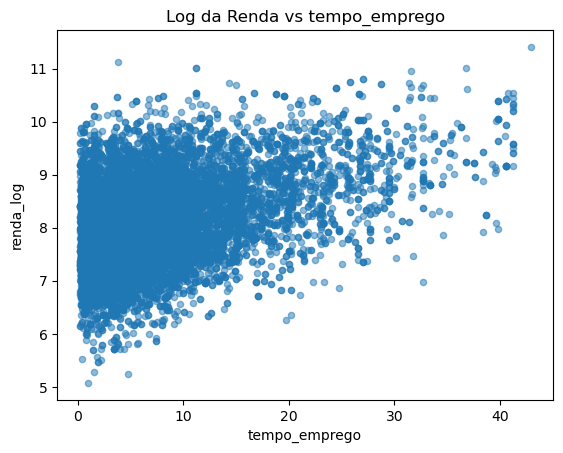

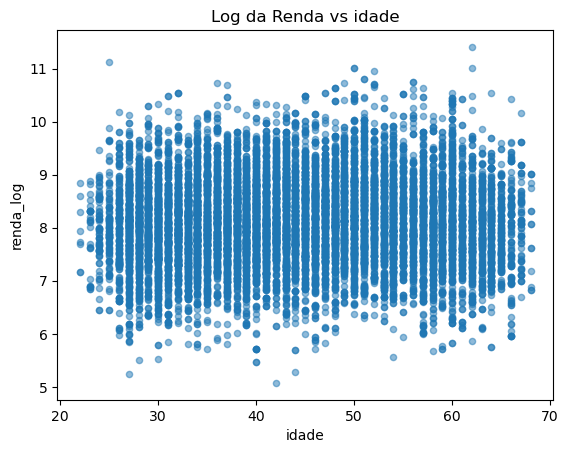

In [21]:
# Lista das duas variáveis mais correlacionadas
variaveis = ["tempo_emprego", "idade"]

# Cria gráficos de dispersão usando a renda logarítmica
for col in variaveis:
    previsao_de_renda.plot.scatter(
        x=col,
        y="renda_log",
        alpha=0.5,
        title=f"Log da Renda vs {col}"
    )
    plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do logaritmo melhorou a análise, pois reduziu a dispersão causada pelos valores muito altos de renda, tornando os pontos mais concentrados e as relações entre renda, tempo de emprego e idade mais visíveis. Com isso, é possível perceber tendências de forma mais clara e equilibrada, sem que os outliers distorçam o gráfico.

O gráfico **"Log da Renda vs idade"** mostra a relação entre idade e o logaritmo da renda, com uma linha de tendência praticamente horizontal, indicando que não há uma correlação forte entre idade e renda. Ou seja, o aumento da idade não parece estar associado a um aumento ou diminuição significativa da renda — a variação é ampla em todas as faixas etárias.

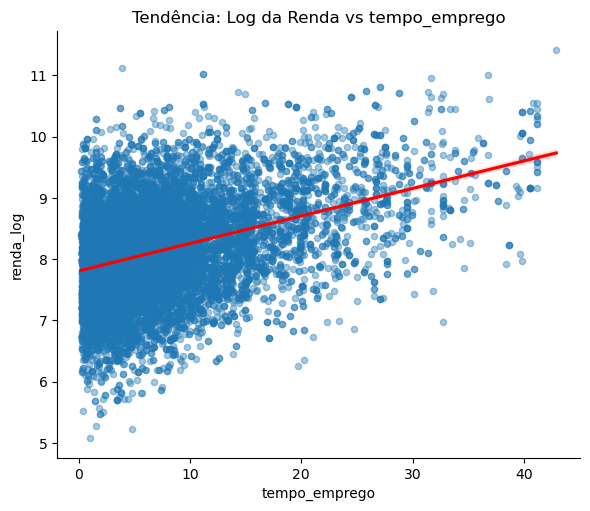

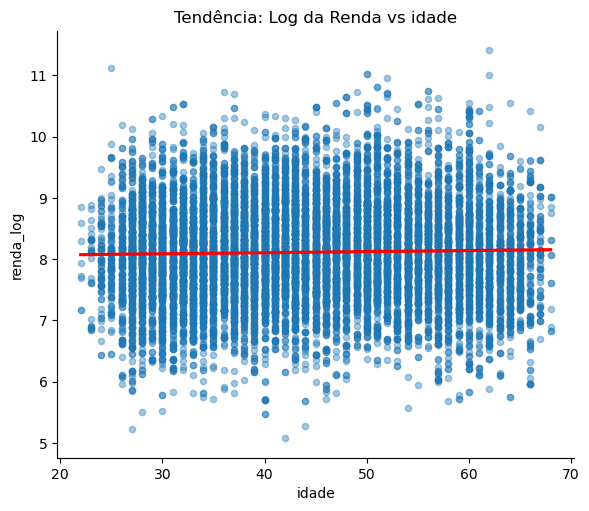

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define as duas variáveis mais correlacionadas
variaveis = ["tempo_emprego", "idade"]

# Cria gráficos com linha de tendência (regressão linear)
for col in variaveis:
    sns.lmplot(
        x=col,
        y="renda_log",
        data=previsao_de_renda,
        scatter_kws={"alpha": 0.4, "s": 20},  # pontos semitransparentes
        line_kws={"color": "red"},             # linha de tendência vermelha
        height=5,
        aspect=1.2
    )
    plt.title(f"Tendência: Log da Renda vs {col}")
    plt.show()